In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
import math
plt.style.use('seaborn')
path = './healthcare-dataset-stroke-data.csv'

## Read data function
def read_data(path):
    df = pd.read_csv(path)
    df = df.dropna(axis = 0)
    df = df[df['gender']!='Other']
    return df

In [351]:
df = read_data(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [362]:
## create categorical names in columns with binary values for plotting.
def create_columns(df, features):
    for column in features:
        newcol = column + '_cat'
        df[newcol]=df[column].apply(lambda x: column if x == 1 else f'no {column}')
        df.reset_index()
    ## create categorical names in columns with binary values for plotting.
    return df

In [363]:
features  = ['hypertension','heart_disease','stroke']
df = create_columns(df,features)
df

hypertension
heart_disease
stroke


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,hypertension_cat,heart_disease_cat,stroke_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,no hypertension,heart_disease,stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,no hypertension,heart_disease,stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,no hypertension,no heart_disease,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,hypertension,no heart_disease,stroke
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,no hypertension,no heart_disease,stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,no hypertension,no heart_disease,no stroke
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,no hypertension,no heart_disease,no stroke
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,no hypertension,no heart_disease,no stroke
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,no hypertension,no heart_disease,no stroke


In [364]:
def plot_categorical(df,features):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots, 1,figsize = (n_plots * 3, n_plots * 4))
    for i,ax in enumerate(axs.flatten()):
        newdf = df[features[i]]
        ## getting the names from value counts
        names = df[features[i]].value_counts().index.tolist()
        ax.pie(newdf.value_counts(),labels = np.array(names),labeldistance=1.1, autopct='%1.1f%%',textprops={'fontsize': 18})
        ax.set_title(f'Distribution of {features[i]}', size = 20)
        sns.set_style("white")
        ## commented code is for donut plot
        #my_circle=plt.Circle( (0,0), 0.7, color='white')
        #p=plt.gcf()
        #p.gca().add_artist(my_circle)
    fig.tight_layout() ## increases spacing between multiple plots

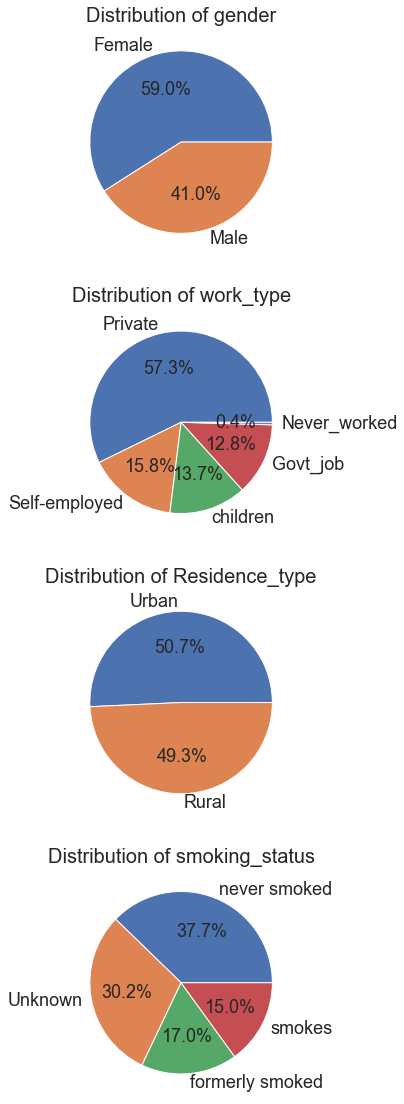

In [365]:
features= ['gender','work_type','Residence_type','smoking_status']
plot_categorical(df,features)

In [366]:

def plot_numerical(df,num_features):
    n_plots = len(num_features)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 5))
    for i,val in enumerate(axs.flatten()):
        newdf = df[features[i]]
        sns.set(font_scale = 2.4)
        sns.set_style("ticks")
        sns.histplot(newdf,ax = axs[i],kde = True, alpha = 0.4, color="teal")
        axs[i].axvline(newdf.median(), color='r', linestyle='--', label="Mean")
    fig.tight_layout()

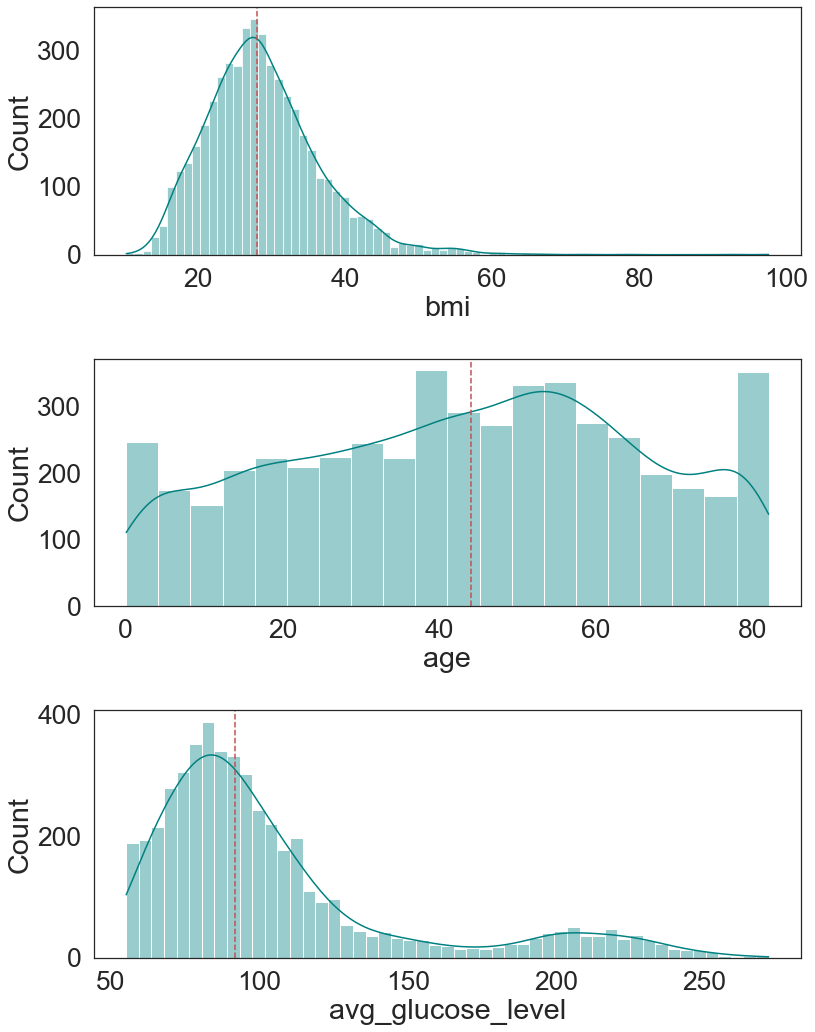

In [367]:
features = ['bmi','age','avg_glucose_level']
plot_numerical(df,features)

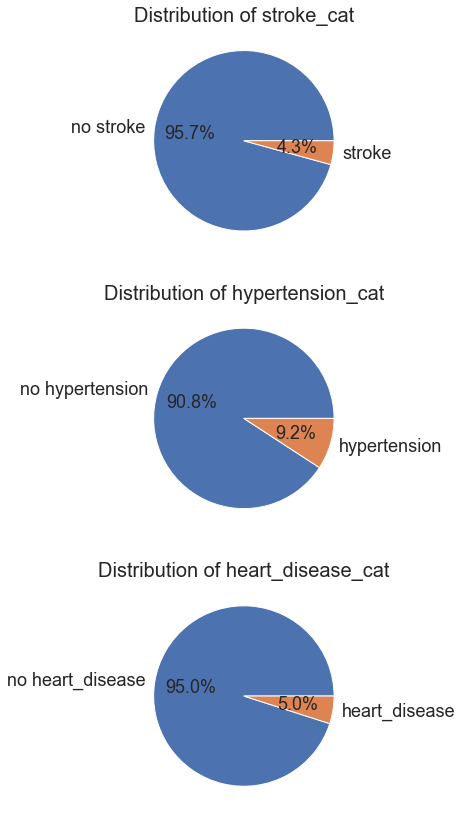

In [368]:
features = ['stroke_cat','hypertension_cat','heart_disease_cat']
plot_categorical(df,features)

$$ \frac{\sum x} {p} $$

## Is having higher BMI associated with stroke?

In [369]:
df_nonstroke = df[df['stroke']==0]
df_stroke = df[df['stroke']==1]

In [370]:
stats.ttest_ind(df_stroke['bmi'],df_nonstroke['bmi'])

Ttest_indResult(statistic=2.968365485973203, pvalue=0.003008355955526417)

In [371]:
df_stroke['bmi']

0      36.6
2      32.5
3      34.4
4      24.0
5      29.0
       ... 
243    40.5
244    36.7
245    30.9
246    29.3
248    19.6
Name: bmi, Length: 209, dtype: float64

In [372]:
stats.ttest_ind(df_stroke['avg_glucose_level'],df_nonstroke['avg_glucose_level'])

Ttest_indResult(statistic=9.830215360205345, pvalue=1.3476353968167712e-22)

#!pip install statannot


<!-- we are doing sampling distribution tests, use CLT to show differences in BMI, do bootstrapping.
to get the visuals.

add violin plots and show dist plots on side -->

## Is BMI, Age and Average Glucose Level associated with stroke?

In [221]:
features = ['bmi','age','avg_glucose_level']


In [222]:
def plot_boxplots(df,num_features,categorical):
    from statannot import add_stat_annotation
    n_plots = len(num_features)
    df[categorical]= df[categorical].astype(str)
    fig,axs = plt.subplots(n_plots, 1, figsize = (n_plots *4, n_plots * 6))
    for i,val in enumerate(axs.flatten()):
    ## convert to category
        sns.set_context("talk")
        sns.set(font_scale = 2.4)
        sns.set_style("ticks")
        sns.violinplot(x =  categorical, y = num_features[i], data = df, palette = 'muted',ax = axs[i])
        axs[i].set_xticklabels(labels = [categorical, f'No {categorical}'])
        axs[i].set_xlabel(f"Comparing {num_features[i]}:{categorical} vs No {categorical}")
        axs[i].xaxis.set_label_position('top') 
        # Then with the str order
        #order = [str(window_id) for window_id in order]
        add_stat_annotation(
            ax = axs[i],
            data=df,
            x= categorical,
            y=num_features[i],
            #order = order,
           box_pairs=[
                (('0', '1')),
            ],
            test="t-test_ind",
            text_format="star",
            loc='inside'
        )
    fig.tight_layout()


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=2.983e-03 stat=2.971e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=3.656e-61 stat=1.673e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.380e-22 stat=9.828e+00


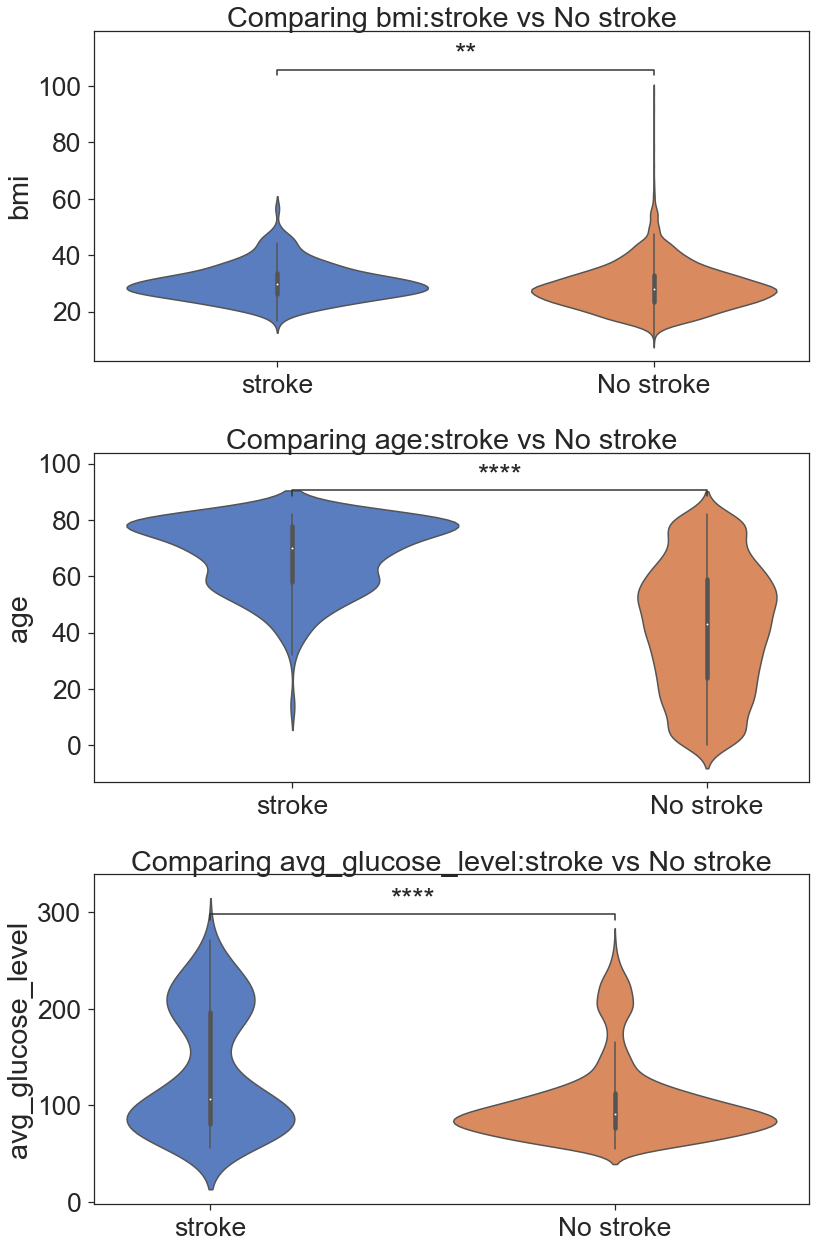

In [223]:
plot_boxplots(df,features,categorical = 'stroke')

In [476]:
### Using Central Limit Theorem
def plot_dist(df, features,categorical):
    n_plots = len(features)
    fig,axs = plt.subplots(n_plots,1 , figsize = (n_plots * 4, n_plots * 5))
    for i,val in enumerate(axs.flatten()):
        df_pos = df[df[categorical]==1][features[i]]
        df_neg = df[df[categorical]==0][features[i]]
        df_pos_mean, df_pos_std  = df_pos.mean(),np.std(df_pos)
        df_neg_mean, df_neg_std  = df_neg.mean(),np.std(df_neg)
        dist_pos = stats.norm(df_pos_mean, df_pos_std)
        dist_neg = stats.norm(df_neg_mean, df_neg_std)
        x = np.linspace(min(df_neg),max(df_pos),10000)
        ## plot positive 
        axs[i].plot(x, dist_pos.pdf(x), linewidth = 2,label = categorical)
        ## plot negative
        axs[i].plot(x, dist_neg.pdf(x), linewidth = 2,color = 'orange',label=f'No {categorical}')
        axs[i].set_xlabel(f"Comparing {features[i]}:{categorical} vs No {categorical}")
        axs[i].xaxis.set_label_position('top') 
        axs[i].legend( frameon=False)
    fig.tight_layout()
    

In [477]:
features = ['bmi','age','avg_glucose_level']


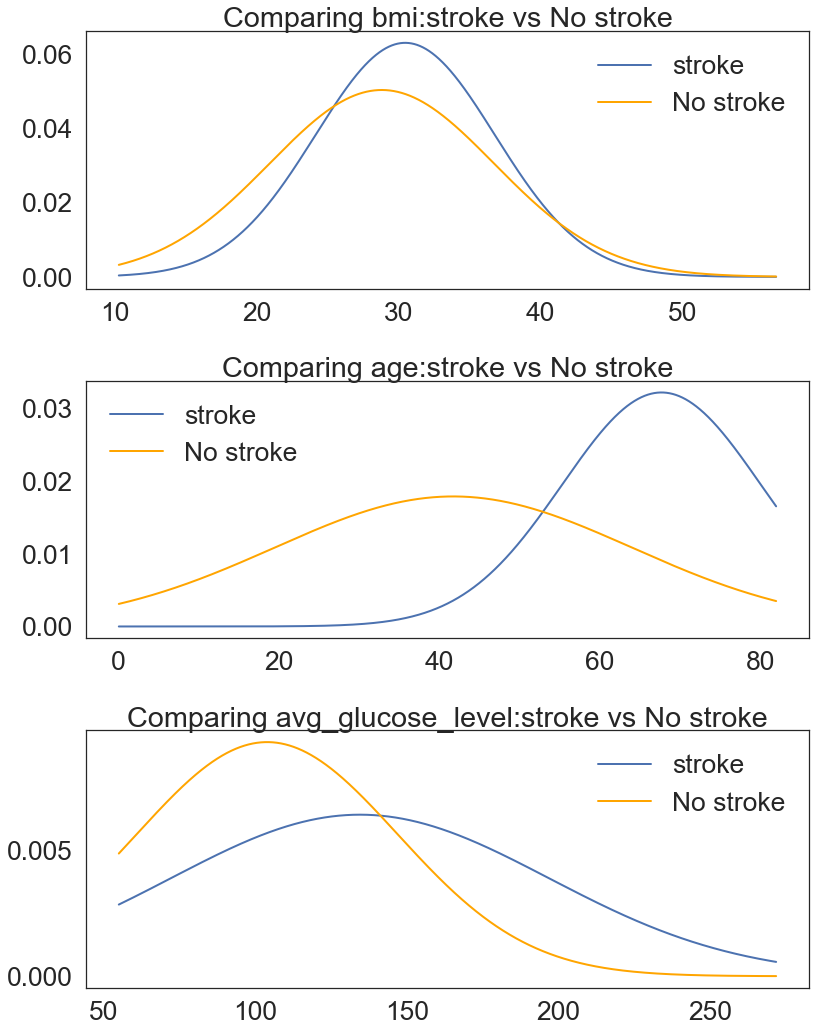

In [478]:
plot_dist(df, features,categorical ='stroke')

### Is BMI, Age and Average Glucose Level associated with heart disease?

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=3.753e-03 stat=2.900e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=5.798e-75 stat=1.864e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 0: t-test independent samples with Bonferroni correction, P_val=1.295e-27 stat=1.096e+01


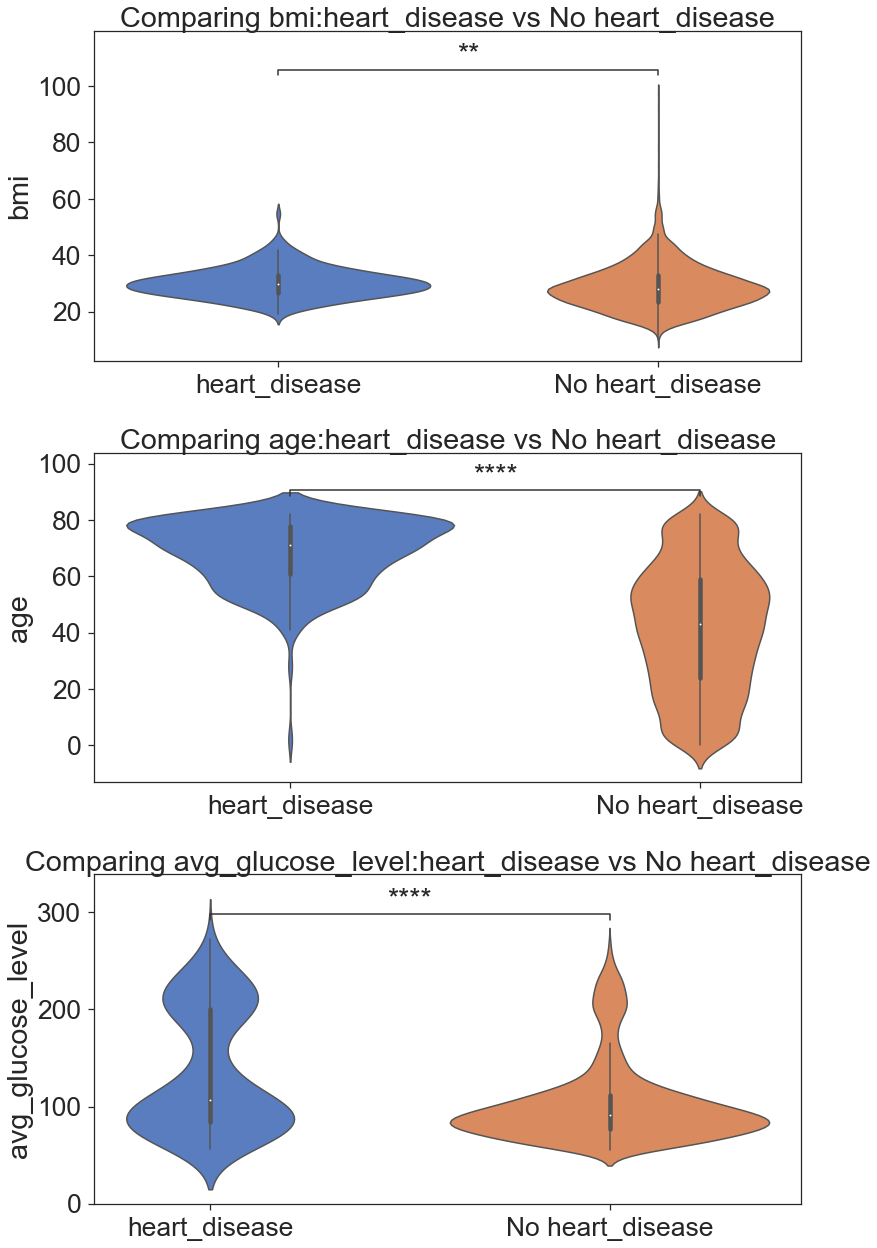

In [224]:
plot_boxplots(df,features,categorical = 'heart_disease')

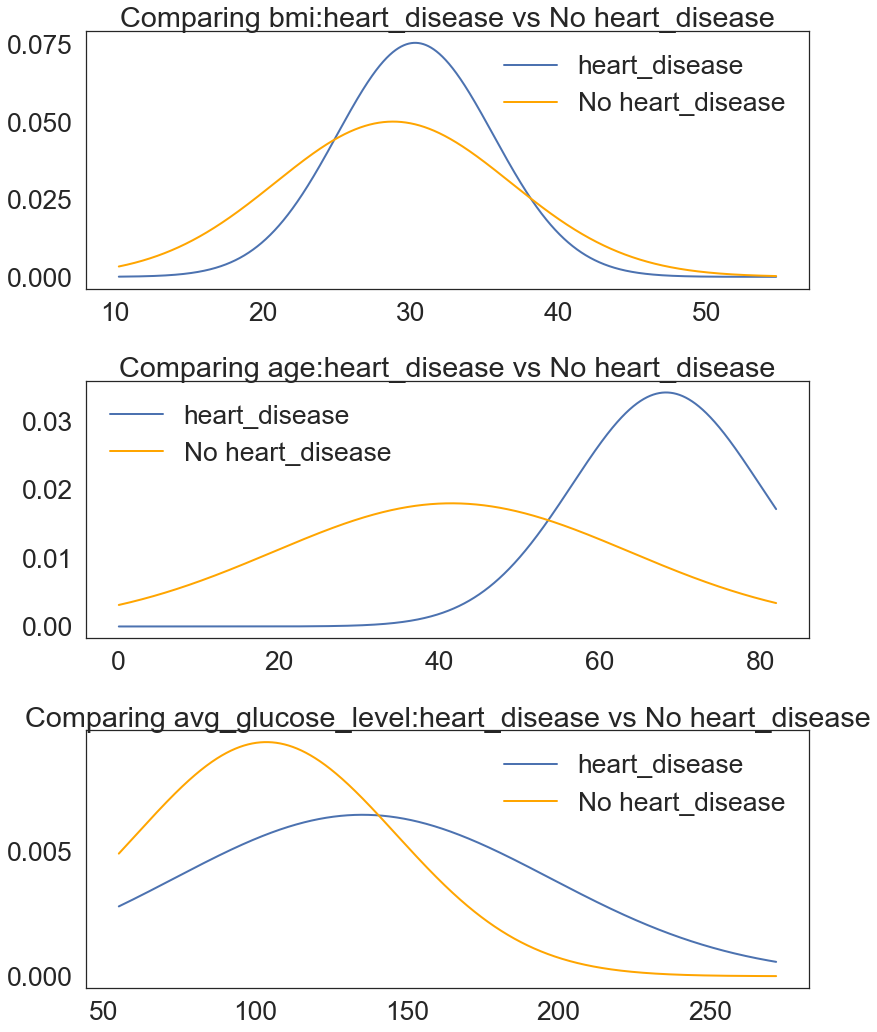

In [479]:
plot_dist(df, features,categorical ='heart_disease')

## Is BMI, Age and Average Glucose Level associated with hypertension?

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test independent samples with Bonferroni correction, P_val=2.466e-32 stat=-1.192e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test independent samples with Bonferroni correction, P_val=1.548e-85 stat=-1.999e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0 v.s. 1: t-test independent samples with Bonferroni correction, P_val=3.066e-37 stat=-1.286e+01


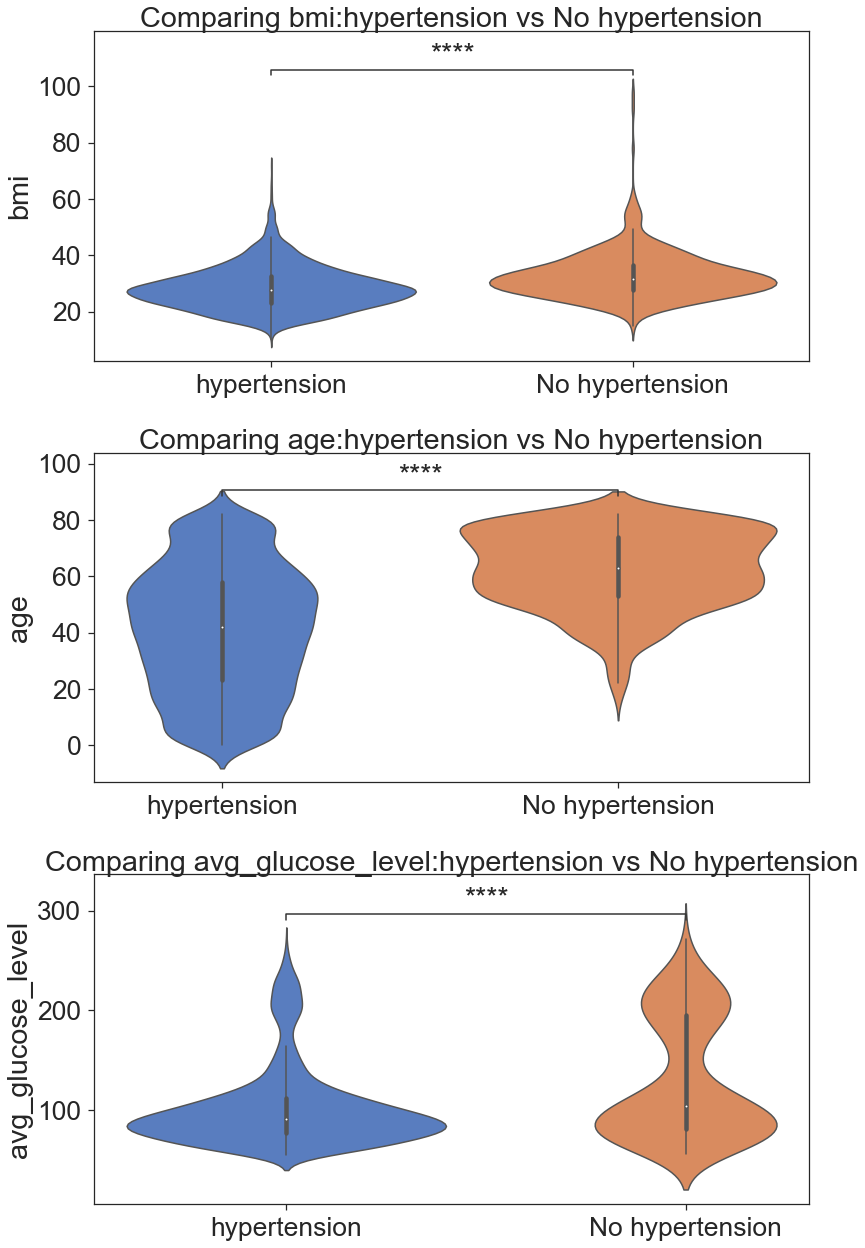

In [225]:
plot_boxplots(df,features,categorical = 'hypertension')

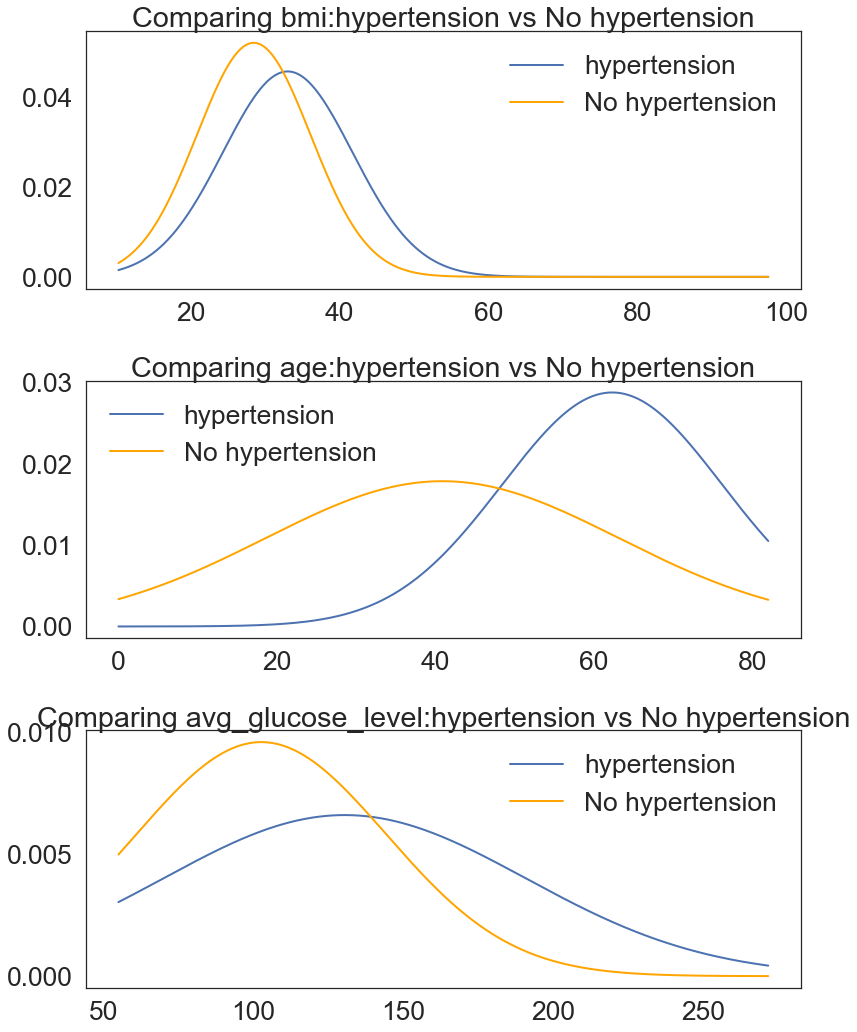

In [480]:
plot_dist(df, features,categorical ='hypertension')

### Are Age,BMI and avg glucose levels correlated?

In [226]:
features = ['bmi','age','avg_glucose_level']
## correlation function
def df_corr(df,features):
    newdf = df[features].corr(method ='spearman')
    return newdf

In [227]:
df2 = df_corr(df,features)
df2

,bmi,age,avg_glucose_level
bmi,1.00000,0.375650,0.114370
age,0.37565,1.000000,0.140809
avg_glucose_level,0.11437,0.140809,1.000000


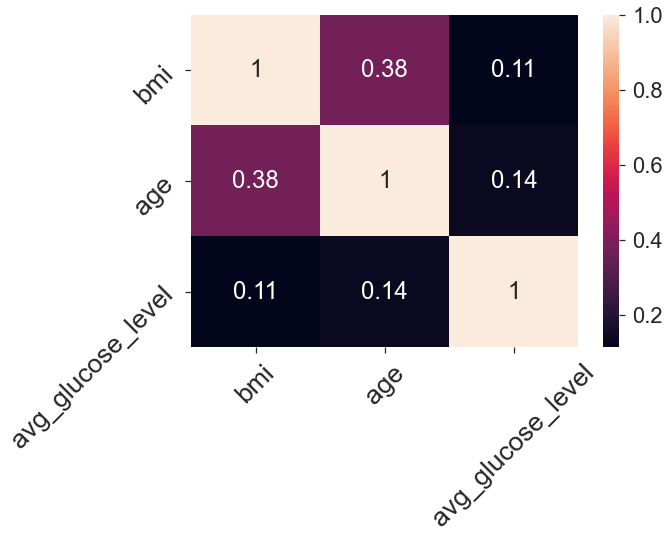

In [228]:
fig,ax = plt.subplots(1, 1, figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(df2,annot=True)
ax.tick_params(labelrotation = 45)
fig.tight_layout()

In [229]:
stats.spearmanr(df['avg_glucose_level'],df['bmi'])[1]

9.160411716327302e-16

In [230]:
stats.spearmanr(df['age'],df['bmi'])[1]

2.475965580704734e-164

In [231]:
## getting p values from correlation
def get_pvals(df,features):
    pvals = np.zeros((3,3))
    for i,val in enumerate(features):
        for j,val2 in enumerate(features):
        ## store p value present in index 1
            pvals[i][j]= stats.spearmanr(df[val],df[val2])[1]
    pvals = pd.DataFrame(pvals)
    pvals.columns = features
    pvals.index = features
    return pvals
    

In [232]:
df_pval = get_pvals(df,features)
df_pval

,bmi,age,avg_glucose_level
bmi,0.000000e+00,2.475966e-164,9.160412e-16
age,2.475966e-164,0.000000e+00,3.670016e-23
avg_glucose_level,9.160412e-16,3.670016e-23,0.000000e+00


## Plotting correlation p-values in heatmap

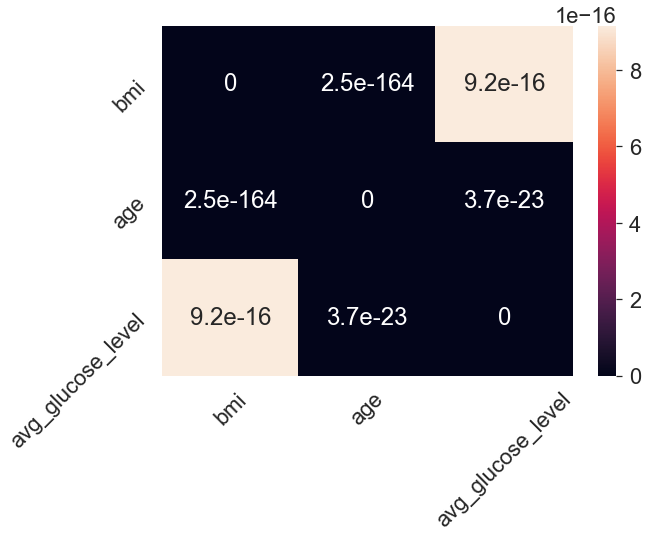

In [233]:
fig,ax = plt.subplots(1, 1, figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(df_pval,annot=True)
ax.tick_params(labelrotation = 45)
fig.tight_layout()

## Comparing categorical and continuous variables

### What is Point-Biserial Correlation?

### categorical vs continuous correlation

    - Like all correlation analyses the Point-Biserial Correlation measures the strength of association or co-occurrence between two variables. (categorical vs continuous)
    - e.g.  indicates a positive relationship between the math score and passing the final exam or failing it. 

Stroke and age are correlated

In [360]:
#df['age'] = df['age'].asdtype(int)
stats.pointbiserialr(df['stroke'], df['age'])

PointbiserialrResult(correlation=0.23231301313066932, pvalue=3.840890384526994e-61)

In [481]:
stats.pointbiserialr(df['heart_disease'], df['age'])

PointbiserialrResult(correlation=0.2571040168665478, pvalue=6.154616812206063e-75)

## Chi squared test
## Testing association between categorical variables

#### Does having heart disease associate with stroke?

### Heart disease and stroke

In [ ]:
# Contingency table.
contingency = pd.crosstab(df['stroke'], df['heart_disease'])
contingency

In [ ]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

Since the p-value is significant, there is association between heart disease and stroke

#### Does having hypertension associate with heart disease?

### Hyper tension and heart disease

In [ ]:
# Contingency table.
contingency = pd.crosstab(df['hypertension'], df['heart_disease'])
contingency

In [ ]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

Since the p-value is significant, there is association between hypertension and heart disease

#### Does having hypertension associate with stroke?

### Hypertension and stroke

In [ ]:
# Contingency table.
contingency = pd.crosstab(df['hypertension'], df['stroke'])
contingency

In [ ]:
# Chi-square test of independence.
chi, p, dof, expected = stats.chi2_contingency(contingency)
chi, p, dof, expected

Since the p-value is significant, there is association between hypertension and stroke

In [ ]:
observed_vals = contingency.reset_index(drop=True)
observed_vals = observed_vals.rename_axis(None, axis=1)
observed_vals.set_index([["hypertension_0", "hypertension_1"]], inplace=True)
observed_vals = observed_vals.reset_index()
observed_vals.rename(columns={"index": "hypertension",0: "stroke_0", 1:"stroke_1"}, inplace=True)
observed_vals

In [ ]:
expected_vals = pd.DataFrame(expected)
expected_vals.set_index([["hypertension_0", "hypertension_1"]], inplace=True)
expected_vals = expected_vals.reset_index()
expected_vals.rename(columns={"index": "hypertension", 0: "stroke_0", 1:"stroke_1"}, inplace=True)
expected_vals

In [ ]:
# Creating a column-wise sum table, adding back the column with hypertension names
col_sum = pd.DataFrame(observed_vals.sum(axis=1), columns=["count"])
col_sum.insert(0, "hypertension", ["hypertension_0", "hypertension_1"], True)
# Creating a row-wise sum table
row_sum = pd.DataFrame(observed_vals.iloc[:,1:].sum(axis=0), columns=["count"])
#row_sum.rename(columns={"index":"stroke"}, inplace=True)
row_sum.insert(0, "stroke", ["stroke_0", "stroke_1"], True)


In [ ]:
# Find all the unique hypertension for pairwise comparison
hypertensions = ['hypertension_0','hypertension_1']
# Find all the unique stroke for pairwise comparison
strokes = ['stroke_0','stroke_1']
# Iterate through all combinations of parties and status
for p in hypertensions:
    for s in strokes:
        observed = float(observed_vals.loc[observed_vals.hypertension == p][s].values[0])
        expected = float(expected_vals.loc[expected_vals.hypertension == p][s].values[0])
        col_total = float(col_sum[col_sum["hypertension"] == p]["count"].values[0])
        row_total = float(row_sum[row_sum["stroke"] == s]["count"].values[0])
        print("observed:" ,observed,"expected:",expected, "coltotal:",col_total,"rowtotal:",row_total)
        expected_row_prop = expected/row_total
        expected_col_prop = expected/col_total
        print("exp",expected_row_prop,expected_col_prop)
        std_resid = (observed - expected) / (math.sqrt(expected * (1-expected_row_prop) * (1-expected_col_prop)))
        print("std_resid",std_resid)
        p_val = stats.norm.sf(abs(std_resid))
        if p_val < 0.05/4:
            print(p, s, std_resid, p_val)

Turns out all aare significant

## Central Limit theorem : Heartdisease vs No heart disease : Stroke(predictor)

We can fit a normal distribution and check the p-value


In [ ]:
df_heartdisease = df[df['heart_disease']==1]
df_noheartdisease = df[df['heart_disease']==0]

In [ ]:
## Null hypothesis  : Mean of having stroke if you dont have heart disease is same(= 0.133)
## Alternate hypothesis  : Mean of having stroke if you dont have heart disease is different.

sd = np.sqrt(.133* (1 - 0.133))/np.sqrt(len(df_heartdisease))
alpha = 0.05 ## rejection threshold                                   
null = stats.norm(0.133,sd)
                                    

In [ ]:
null.cdf(.03342)

## Bayes

Beta Binomial: The difference between the binomial and the beta is that the former models the number of successes (x), while the latter models the probability (p) of success.
In other words, the probability is a parameter in binomial; In the Beta, the probability is a random variable.


In our data, 
Rate of stroke follows beta prior.

In this we already have stroke/not stroke populations so we assume is distributed as bernoulli.
and then we find the number of counts of stroke, which can be distributed as beta distribution.

In [ ]:
## Jeffrey's prior shown
support = np.linspace(0,1,100)
prior = stats.beta(1/2,1/2)
pdf = prior.pdf(support)
plt.plot(support,pdf)

### We will use Jeffrey's prior which will mean you have an equal chance of having stroke if you have heart disease vs not

In [ ]:
from matplotlib import animation,rc
from IPython.display import HTML


a = 1/2
b = 1/2

## creating samples of equal size from heart disease and no heart disease
samp1  = df_heartdisease['stroke'].sample(n = 1000,replace = True)
samp2 = df_noheartdisease['stroke'].sample(n = 1000,replace = True)


#alpha(a) is count of stroke positive individuals (prior counts of stroke positive)
#beta(b) is count of stroke negative individuals (prior counts of stroke negative)

## creating objects for plots
fig,ax =plt.subplots(figsize = [10,6])
ax.set_xlim((0,1))
ax.set_ylim((0,20))

##plots for animation
line, = ax.plot([],[])
vline = ax.axvline(0)
title = ax.set_title('')

## support of values
## also x-axis for pdf plots
support = np.linspace(0,1,100)

## create an array full of zeros to hold pdf's for posterior distribution
pdf = np.zeros([len(samp1)+1,100])

## create array of median of zeros

medians = np.zeros(len(samp1)+1)

## initializing beta prior
beta = stats.beta(a,b)

## pdf of support
pdf[0] = beta.pdf(support)
#pdf[0]

medians[0] = beta.ppf(0.5)

for i,s in enumerate(samp1):
    if s ==1:
        a+=1
    elif s ==0:
        b+=1
        ## new posterior beta distribution 
        beta = stats.beta(a,b)
        ## fill oout next pdf with updated posterior
        pdf[i+1] = beta.pdf(support)
        medians[i+1] = beta.ppf(0.5)
## store in the final no heart disease posterior     
heartdis_posterior = beta
        
def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    line.set_data(support,pdf[i])
    vline.set_xdata(medians[i])
    
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func = init,
                              frames = len(samp1)+1, interval = 50, blit =True)
print(samp1.mean())
plt.close()


In [ ]:
#!pip install ffmpeg
#import ffmpeg
#conda install -y -c conda-forge ffmpeg

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
from matplotlib import animation,rc
from IPython.display import HTML


a = 1/2
b = 1/2

#alpha(a) is count of stroke positive individuals (prior counts of stroke positive)
#beta(b) is count of stroke negative individuals (prior counts of stroke negative)

## creating objects for plots
fig,ax =plt.subplots(figsize = [10,6])
ax.set_xlim((0,1))
ax.set_ylim((0,20))

##plots for animation
line, = ax.plot([],[])
vline = ax.axvline(0)
title = ax.set_title('')

## support of values
## also x-axis for pdf plots
support = np.linspace(0,1,100)

## create an array full of zeros to hold pdf's for posterior distribution
pdf = np.zeros([len(samp2)+1,100])

## create array of median of zeros

medians = np.zeros(len(samp2)+1)

## initializing beta prior
beta = stats.beta(a,b)

## pdf of support
pdf[0] = beta.pdf(support)
#pdf[0]

medians[0] = beta.ppf(0.5)

for i,s in enumerate(samp2):
    if s ==1:
        a+=1
    elif s ==0:
        b+=1
        ## new posterior beta distribution 
        beta = stats.beta(a,b)
        ## fill oout next pdf with updated posterior
        pdf[i+1] = beta.pdf(support)
        medians[i+1] = beta.ppf(0.5)
## store in the final no heart disease posterior     
noheartdis_posterior = beta
        
def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    line.set_data(support,pdf[i])
    vline.set_xdata(medians[i])
    
    return (line,)

anim = animation.FuncAnimation(fig,animate,init_func = init,
                              frames = len(samp2)+1, interval = 50, blit =True)
print(samp2.mean())
plt.close()
        

In [ ]:
HTML(anim.to_html5_video())

## Hypothesis testing with Bayes

In [ ]:
## Now we have a posterior distribution of both and we can say which is more likely.
## what portion of posterior pdf of heart disease is above 0.033
support = np.linspace(0,1,10000)
#prior = stats.beta(1/2,1/2)
heartdis_posteriorpdf = heartdis_posterior.pdf(support)
noheartdis_posteriorpdf = noheartdis_posterior.pdf(support)
fig,ax =plt.subplots(figsize = (14,10))
ax.plot(support,heartdis_posteriorpdf)
ax.plot(support,noheartdis_posteriorpdf)
ax.legend(['heart disease posterior','no heart disease posterior'])
ax.set_xlim(0,0.23)
## Question answered: how likely to get stroke if have heart disease
plt.axvline(0.03342)
## so 100% more likely to have stroke if you have heart disease?

In [ ]:
1-heartdis_posterior.cdf(samp2.mean())
## 100% of the time posterior disribution if you have heart disease is greater
## than the posterior distribution if you dont have heart disease

#### 100% of the time posterior disribution if you have heart disease is greater than the posterior distribution if you dont have heart disease ?

## Comparing two distributions (another way)

In [ ]:
## Now we can sample from both distributions 
## What percent of the time you will have stroke if you have heart disease vs if you do not have heart disease?
heartdis_samples = heartdis_posterior.rvs(10)
noheartdis_samples = noheartdis_posterior.rvs(10)
a_gt_b = heartdis_samples>noheartdis_samples


In [ ]:
a_gt_b.mean() ### 100 percent more likely to have stroke if you have heart disease?

## Bayes Hypothesis testing: Male vs Female (comparing rate of stroke)

   - Question: Are male more likely to have stroke?
   - Null : There is no difference.
   - Alternate: Male are more likely to have stroke than females.

In [ ]:
df_male = df[df['gender']=='Male']
df_male.count()

In [ ]:
df_female = df[df['gender']=='Female']
df_female.count()

In [ ]:
np.sum(df_male['stroke']),np.sum(df_female['stroke'])

### Fitting a beta distribution to get posterior beta

In [ ]:
post_male = stats.beta(1/2+89, 1/2 + 2011 - 89)
post_female = stats.beta(1/2+120, 1/2 + 2897 - 120)

In [ ]:
## Hypothesis testing with Bayes 

## Now we have a posterior distribution of both and we can say which is more likely.
## what portion of posterior pdf of heart disease is above 0.033
support = np.linspace(0,1,10000)
#prior = stats.beta(1/2,1/2)
post_malepdf = post_male.pdf(support)
post_femalepdf = post_female.pdf(support)
fig,ax =plt.subplots(figsize = (14,10))
ax.plot(support,post_malepdf)
ax.plot(support,post_femalepdf)
plt.legend(['male posterior','female posterior'])
ax.set_xlim(0,0.15)
ax.set_ylim(0,130)

## Question answered: how likely to get stroke if you are male
1 - post_male.cdf(np.mean(df_female['stroke']))
#plt.axvline(0.041)
## so 74% more likely to have stroke if you are male?

### We can say so 74% more likely to have stroke if you are male.

#### Comparing two psoterior distributions another way


In [ ]:
## Now we can sample from both distributions 
## What percent of the time you will have stroke if you are male vs if you are female?
male_samples = post_male.rvs(1000)
female_samples = post_female.rvs(1000)
a_gt_b = male_samples>female_samples
a_gt_b.mean()

### Credible Intervals

(Frequentist's approach):
   - Having fitted the model, we regularly want to get an interval for the true population mean. 
   - In frequentist statistics, these intervals are called "confidence intervals". 
   - Remember that in frequentist statistics the idea is that there is a true, unknown population parameter and the data is random. 
    
   - Then, the idea is to derive the confidence interval from a sample so that we can state that an interval constructed this way will contain the true parameter e.g., 95% of times.
   - Hence, with confidence intervals, we can only make probabilistic statements about the interval, not the parameter. We cannot say that the interval contains the true parameter with 95% probability.

#### In Bayes

   - In contrast, Bayesian credible intervals allow for these kind of probabilistic statements about the parameter.
   - They can be constructed very intuitively directly from the posterior by deriving e.g., the 95% highest density interval. 
   - Then, we can say that constructed interval contains the parameter with 95% probability.

#### Credibility interval of rate of stroke for Male and females 


In [ ]:
post_male.interval(0.95),post_female.interval(0.95)

References:

Bayesian inference intro
https://www.kaggle.com/philippsinger/introduction-to-bayesian-inference

Applications of AB testing
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5626665/

Awesome resource on beta binomial
https://towardsdatascience.com/beta-distribution-intuition-examples-and-derivation-cf00f4db57af


Eexploratory data analysis
https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

Correlation
https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365

https://towardsdatascience.com/how-to-test-for-statistically-significant-relationships-between-categorical-variables-with-chi-66c3ebeda7cc

